# Feature Selection (using Chi Sq test)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('churn_data_st.csv')
df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [5]:
# JUST MAKING A COPY AND WORKING WITH THE COPY
churn_df = df.copy()
churn_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [6]:
 churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   ServiceCount      7043 non-null   int64  
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7016 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


In [7]:
churn_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
tenure               0
ServiceCount         0
Contract             0
PaperlessBilling     0
MonthlyCharges       0
TotalCharges        27
Churn                0
dtype: int64

In [8]:
churn_df.shape

(7043, 10)

In [11]:
churn_df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
tenure                73
ServiceCount           9
Contract               3
PaperlessBilling       2
MonthlyCharges      1585
TotalCharges        6514
Churn                  2
dtype: int64

## Setting the Hypothesis

- Null Hypothesis : There is no relationship between 2 categorical values
- Alternate Hypothesis : There is Relation between 2 categorical values

## Questions to answer through statistical test
1. Is there any relationship between user who have Churned to **Gender** of the user ?
2. Is there any relationship between users who have opted for **paperless billing** to the users who have Churned?

### There are many statistical test available for the categorical variables 
1. **Chi square test** : Tells the signifance of the relationship  
2. **Cramer V Tests** : Tells the strength of the relationship
3. **Fishers Excat Test** : Observations whose category is less (with only 2 categories of atleast less than 5 categories)

In [12]:
churn_df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

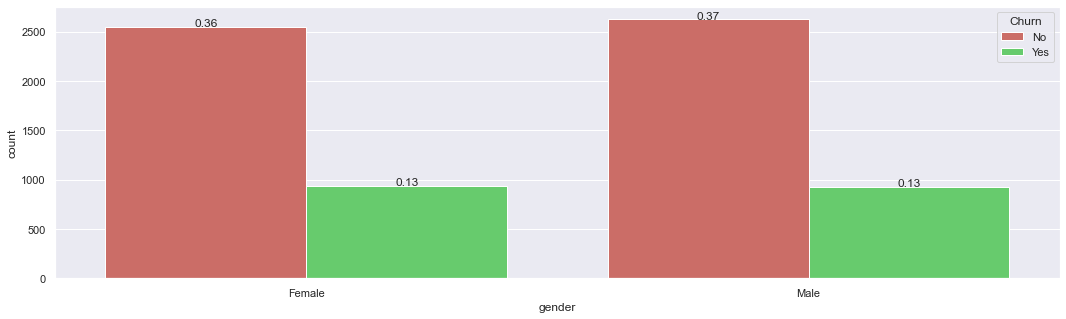

In [43]:
sns.set(style ="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(18,5))
ax = sns.countplot(x="gender", hue="Churn", data=churn_df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+3,'{:1.2f}'.format(height/churn_df.shape[0]),ha="center")

# NOTE : Statistics alone cannot prove anything.  All the tests we do are based on relative likelihood

In [24]:
# CONTENGINCY TABLE : FIRST THE WAY HOW THE CHI SQUARE TEST WORKS IS THAT IS TO CREATE A CONTENGINCY TABLE ...OR CROSS TAB
# THEY ARE MAINLY USED TO SUMMARIZE THE RELATIONSHIP BETWEEN THE CATEGORICAL VALUES!!!

gender_churn_ct = pd.crosstab(index=churn_df['gender'], columns=churn_df['Churn'])
gender_churn_ct

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [30]:
gender_churn_ct.iloc[0].values

array([2549,  939], dtype=int64)

In [32]:
from scipy import stats
(chi2, p, dof, _) = stats.chi2_contingency([gender_churn_ct.iloc[0].values, gender_churn_ct.iloc[1].values])

In [35]:
print('chi2  : ', chi2)
print('p-value : ', p)
print('Degree of freedom (total categories -1) : ', dof)

chi2  :  0.4840828822091383
p-value :  0.48657873605618596
Degree of freedom (total categories -1) :  1


**NOTE : The more the chi2 value is the more the probability that the variable is statistically significant variable**


     Now look into the chi sq table ....
     here the p-value is 0.48 which is less than the 0.5 which we have already set when defining the hypothesis!!
     So in this case NULL HYPOTHESIS is TRUE because the value is < 0.5 so we are FAILING to reject the NULL HYPOTHESIS
     So, the GENDER column is not a significant column so while doing feature selection we can drop that column and move 
     forward

    Chi-SQ Statistics :
    X^2 = sum((Observed-Expected)^2/Expected)

In [38]:
# CREATING THE CONTENGINCY TABLE WITH SUM OF EACH COLUMNS AND EACH ROWS

pd.crosstab(index=churn_df['gender'], columns=churn_df['Churn'], margins=True)

Churn,No,Yes,All
gender,,,
Female,2549,939,3488
Male,2625,930,3555
All,5174,1869,7043


In [39]:
((2549-3488)*5174)/7043 # THIS IT WILL DO FOR EACH OF THE VARIABLE THEN SUM IT UP

-689.8176913247196

     The more the Observed and Expected values are closed to each other you will get a lower Chi Square Value
     When they are significantly apart then you will get a higher Chi Square Value

### lets now test for the PaperlessBiling 

In [52]:
churn_df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

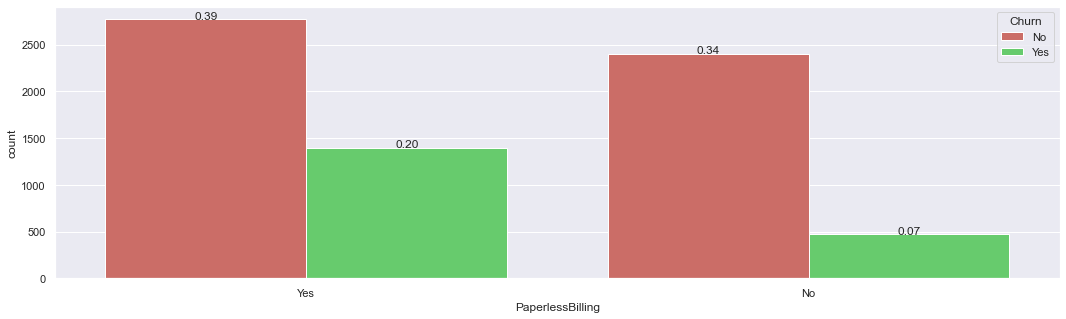

In [53]:
sns.set(style ="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(18,5))
ax = sns.countplot(x="PaperlessBilling", hue="Churn", data=churn_df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+3,'{:1.2f}'.format(height/churn_df.shape[0]),ha="center")

In [54]:
pb_churn_ct = pd.crosstab(index=churn_df['PaperlessBilling'], columns=churn_df['Churn'])
pb_churn_ct

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


In [55]:
pb_churn_ct.iloc[0].values

array([2403,  469], dtype=int64)

In [56]:
from scipy import stats
(chi2, p, dof, _) = stats.chi2_contingency([pb_churn_ct.iloc[0].values, pb_churn_ct.iloc[1].values])

In [57]:
print('chi2  : ', chi2)
print('p-value : ', p)
print('Degree of freedom (total categories -1) : ', dof)

chi2  :  258.27764906707307
p-value :  4.073354668665985e-58
Degree of freedom (total categories -1) :  1


In [59]:
# CREATING THE CONTENGINCY TABLE WITH SUM OF EACH COLUMNS AND EACH ROWS

pd.crosstab(index=churn_df['PaperlessBilling'], columns=churn_df['Churn'], margins=True)

Churn,No,Yes,All
PaperlessBilling,,,
No,2403,469,2872
Yes,2771,1400,4171
All,5174,1869,7043
